In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

# Lecture 8 

## Categorical Distribution ##

In [2]:
top = Table.read_table('top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
studios = top.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [4]:
studio_distribution = studios.group('Studio')

In [5]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [6]:
sum(studio_distribution.column(1))

200

## Bar Charts ##

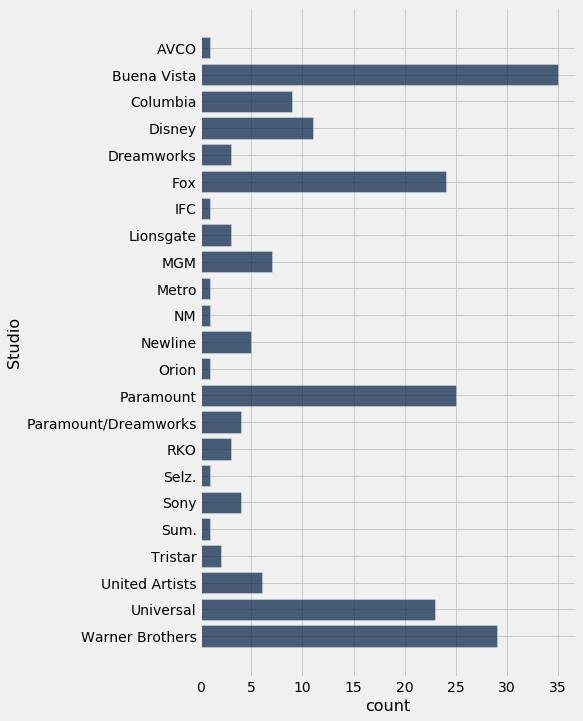

In [7]:
studio_distribution.barh('Studio')

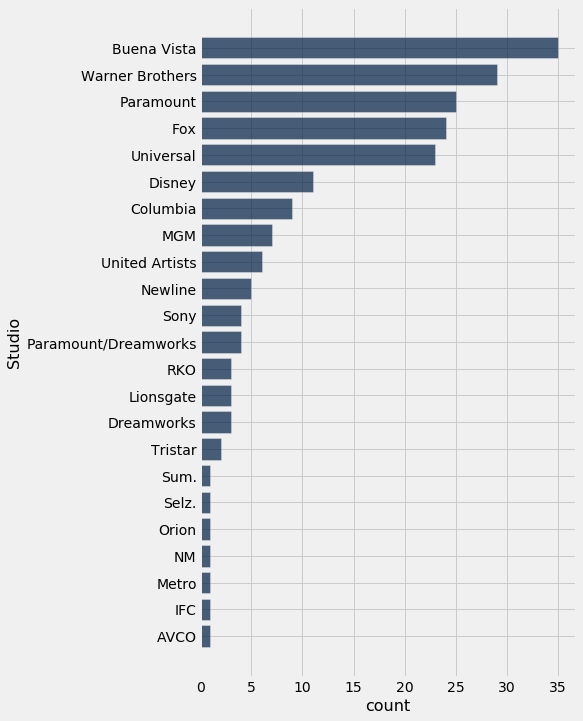

In [8]:
studio_distribution.sort(1, descending=True).barh(0)

## Numerical Distribution ##

In [9]:
ages = 2021 - top.column('Year')
top = top.with_column('Age', ages)

In [10]:
top

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,82
Star Wars,Fox,460998007,1583483200,1977,44
The Sound of Music,Fox,158671368,1266072700,1965,56
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,39
Titanic,Paramount,658672302,1204368000,1997,24
The Ten Commandments,Paramount,65500000,1164590000,1956,65
Jaws,Universal,260000000,1138620700,1975,46
Doctor Zhivago,MGM,111721910,1103564200,1965,56
The Exorcist,Warner Brothers,232906145,983226600,1973,48
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,84


## Binning ##

In [11]:
[min(ages), max(ages)]

[4, 100]

In [12]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [13]:
top.bin('Age', bins = my_bins)

bin,Age count
0,3
5,25
10,18
15,39
25,42
40,53
65,20
100,0


In [14]:
sum(top.bin('Age', bins = my_bins).column(1))

200

In [15]:
top.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,85
25,69
50,36
75,10
100,0


## Histograms ##

In [16]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [17]:
top.bin('Age', bins = my_bins)

bin,Age count
0,3
5,25
10,18
15,39
25,42
40,53
65,20
100,0


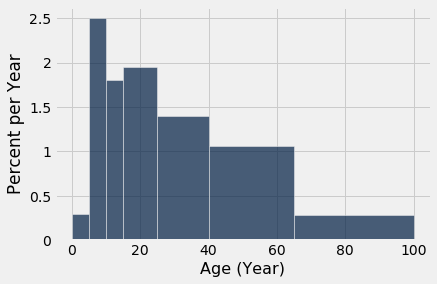

In [18]:
top.hist('Age', bins = my_bins, unit = 'Year')

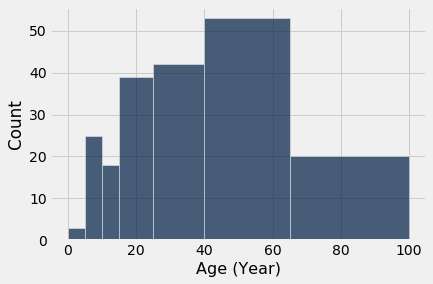

In [19]:
# What *not* to do:
top.hist('Age', bins = my_bins, unit = 'Year', normed = False)

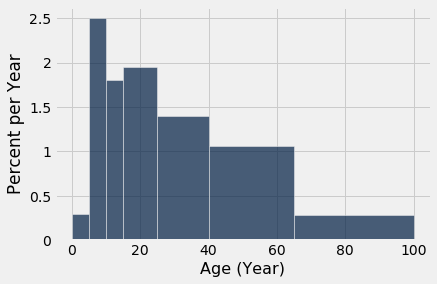

In [20]:
top.hist('Age', bins = my_bins, unit = 'Year')

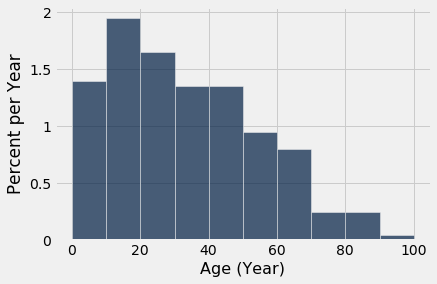

In [21]:
top.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

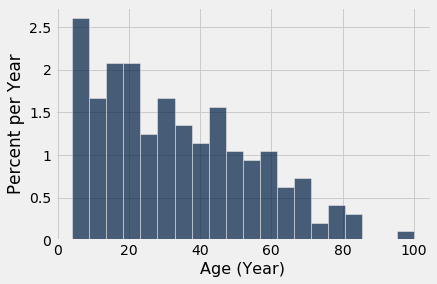

In [22]:
top.hist('Age', bins = 20, unit = 'Year')

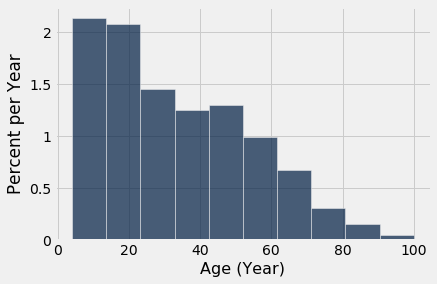

In [23]:
top.hist('Age', unit='Year')

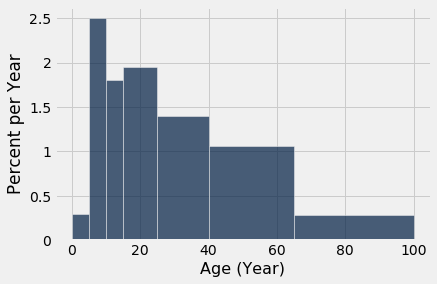

In [24]:
top.hist('Age', bins = my_bins, unit = 'Year')

In [25]:
distribution = top.bin('Age', bins = my_bins)

In [26]:
distribution

bin,Age count
0,3
5,25
10,18
15,39
25,42
40,53
65,20
100,0


In [27]:
# 52 out of 200 movies in the [40, 65) bin

percent = (52/200) * 100
percent

26.0

In [28]:
width = 65 - 40
width

25

In [29]:
height = percent / width
height

1.04